In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/MyDrive/woc/Classification_train.csv')
X_train = np.array(df.iloc[0:20000,1:], dtype="int")/256
Y_train =np.array(df.iloc[0:20000,0:1], dtype="int")
X_test = np.array(df.iloc[20000:,1:], dtype="int")/256
Y_test =np.array(df.iloc[20000:,0:1], dtype="int")
X_train.shape

(20000, 784)

In [ ]:
""" m=y.size
      Yh=self.one_hotcode(Y)
      dz2=A2-Yh
      dw2=1/m*np.dot(dz2,A1.T)
      db2=1/m*np.sum(dz2,2)
      dz1=np.dot(W2.T,dz2)*(Z1>0)
      dw1=1/m*np.dot(dz1,A0.T)
      db1=1/m*np.sum(dz1,2)
      return dw1,db1,dw2,db2"""

In [10]:
class nnetwork:
   def __init__(self,layers,alpha,iterations,activation="tanh"):
       self.alpha=alpha
       self.iterations=iterations
       self.activation=activation
       self.layers=layers
       self.n=len(layers)-2
       self.w={}
       self.b={}
   def softmax(self,z):
        max=np.max(z,axis=1,keepdims=True)
        exp=np.exp(z-max)
        sum_exp=np.sum(exp,axis=1,keepdims=True)
        soft=exp/sum_exp
        return soft
   def calc(self,w,b,x):
        z=np.dot(w,x.T)+b
        z=z.T
        return z
   """def one_hotcode(self,y):
      Yh=np.zeros((len(y),len(np.unique(y))))
      for i in range(len(y)):
        Yh[i][y[i]]=1
      return Yh"""
   def one_hotcode(self,y):
    Yh = np.zeros((len(y), 10))
    for i in range(len(y)):
        Yh[i][y[i]] = 1
    return Yh
   def Sigmoid(self,x):
      return 1/(1+np.exp(-x))
   def sigmoid_der(self,x):
      x=self.Sigmoid(x)
      return x*(1-x)
   def Leaky_ReLU(self,x):
      r=x*(x>0)+x*(0.01)*(x<0)
      return r
   def tanh(self,z):
        return np.tanh(z)
   def tanh_der(self,z):
        return 1-((np.tanh(z))**2)
   def f_prop(self,n,w,b,data):
     Z={}
     A={}
     A[0]=data
     for i in range(n):
        Z[i]=self.calc(w[i],b[i],A[i])
        if (self.activation=="tanh"):
          A[i+1]=self.tanh(Z[i])
        if (self.activation=="sigmoid"):
          A[i+1]=self.Sigmoid(Z[i])
        if (self.activation=="leaky_relu"):
          A[i+1]=self.Leaky_ReLU(Z[i])
     Z[n]=self.calc(w[n],b[n],A[n])
     A[n+1]=self.softmax(Z[n]) #(m,10)
     return Z,A
   def b_prop(self,n,w,b,Z,A,y):
     m=y.shape[0]
     dw={}
     db={}
     Yh=self.one_hotcode(y)
     grad=A[n+1]-Yh   #(m,10)
     for i in range(n+1):
       dw[n-i]=np.dot(grad.T,A[n-i])
       db[n-i]=np.sum(grad,axis=0).reshape(-1,1)
       if i<n:
        if (self.activation=="tanh"):
          grad=np.dot(grad,w[n-i])*self.tanh_der(Z[n-i-1])
        if (self.activation=="sigmoid"):
          grad=np.dot(grad,w[n-i])*self.sigmoid_der(Z[n-i-1])
        if (self.activation=="leaky_relu"):
          grad=np.dot(grad,w[n-i])*(Z[n-i-1]>0)+np.dot(grad,w[n-i])*(Z[n-i-1]<0)*0.01
     for i in range(n):
       w[i]-=self.alpha*(1/m)*dw[i]
       b[i]-=self.alpha*(1/m)*db[i]
     return w,b
   def Train(self,x,y,batch_size=32):
       m=len(y)
       w=self.w
       b=self.b
       Yh=self.one_hotcode(y)
       L=[]
       for i in range(1,self.n+2):
          w[i-1]=np.random.randn(self.layers[i],self.layers[i-1])
          b[i-1]=np.random.randn(self.layers[i],1)
       for i in range(self.iterations):
          for j in range(0,m,batch_size):
                mini_batch_x=x[j:j+batch_size]
                mini_batch_y=y[j:j+batch_size]

                Z,A=self.f_prop(self.n,w,b,mini_batch_x)
                w,b=self.b_prop(self.n,w,b,Z,A,mini_batch_y)
          Z,A=self.f_prop(self.n,w,b,x)
          w,b=self.b_prop(self.n,w,b,Z,A,y)
          loss=-np.sum(Yh*np.log(A[self.n + 1]+1e-12)) / m
          L.append(loss)
       plt.plot(np.arange(self.iterations),L,label=f'{self.activation} activation')
       plt.xlabel("iterations")
       plt.ylabel("loss")
       plt.legend()
       self.w=w
       self.b=b
   def Test(self,x,y):
       Z,A=self.f_prop(self.n,self.w,self.b,x)
       yp=np.argmax(A[self.n+1],axis=1).reshape(-1,1)
       return np.mean(yp==y)

[[6]
 [2]
 [4]
 ...
 [9]
 [3]
 [9]]
0.9569615912208504


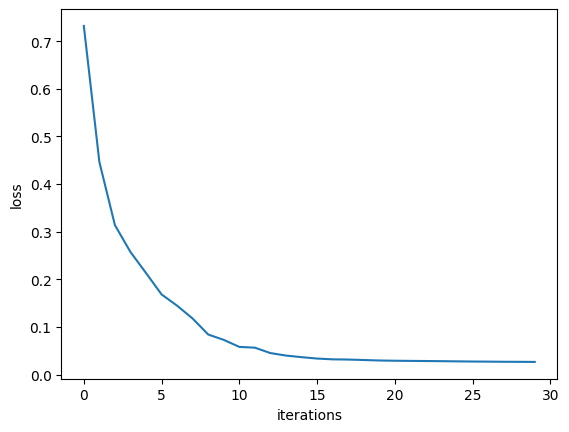

In [49]:
N=nnetwork([784,426,68,10],0.3,30)
N.Train(X_train,Y_train)
N.Test(X_test,Y_test)

Accuracy for tanh activation is 94.17%
Accuracy for sigmoid activation is 95.39%
Accuracy for leaky_relu activation is 96.7%
leaky_relu has the highest accuracy of 96.7%


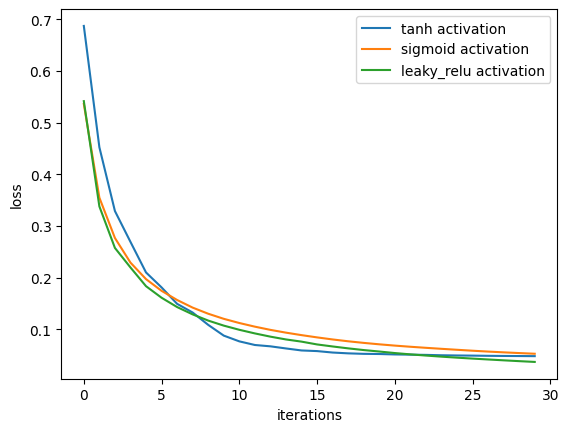

In [11]:
activations=["tanh","sigmoid","leaky_relu"]
activation=None
accuracy=0
for i in activations:
  N=nnetwork([784,426,68,10],0.3,30,i)
  N.Train(X_train,Y_train)
  a=N.Test(X_test,Y_test)
  print(f"Accuracy for {i} activation is {a*100}%")
  if a>accuracy:
     accuracy=a
     activation=i
print(f"{activation} has the highest accuracy of {accuracy*100}%")